In [41]:
#import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

#import data file & preview data 
df = pd.read_csv('/Users/Amanda.Hartzler/Desktop/Data_Analytics_Masters/D206/churn_raw_data.csv')
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,150.761216,271.493436,4,4,4,3,4,4,4,5


In [42]:
#determine column names, non-null values, & types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [43]:
#determine if any rows are duplicated 
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [44]:
#delete any duplicated rows
df.drop_duplicates()
print(len(df))

10000


In [45]:
#no duplicated values in dataset
#determine which variables contain null values & how many null values
df.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

<AxesSubplot:>

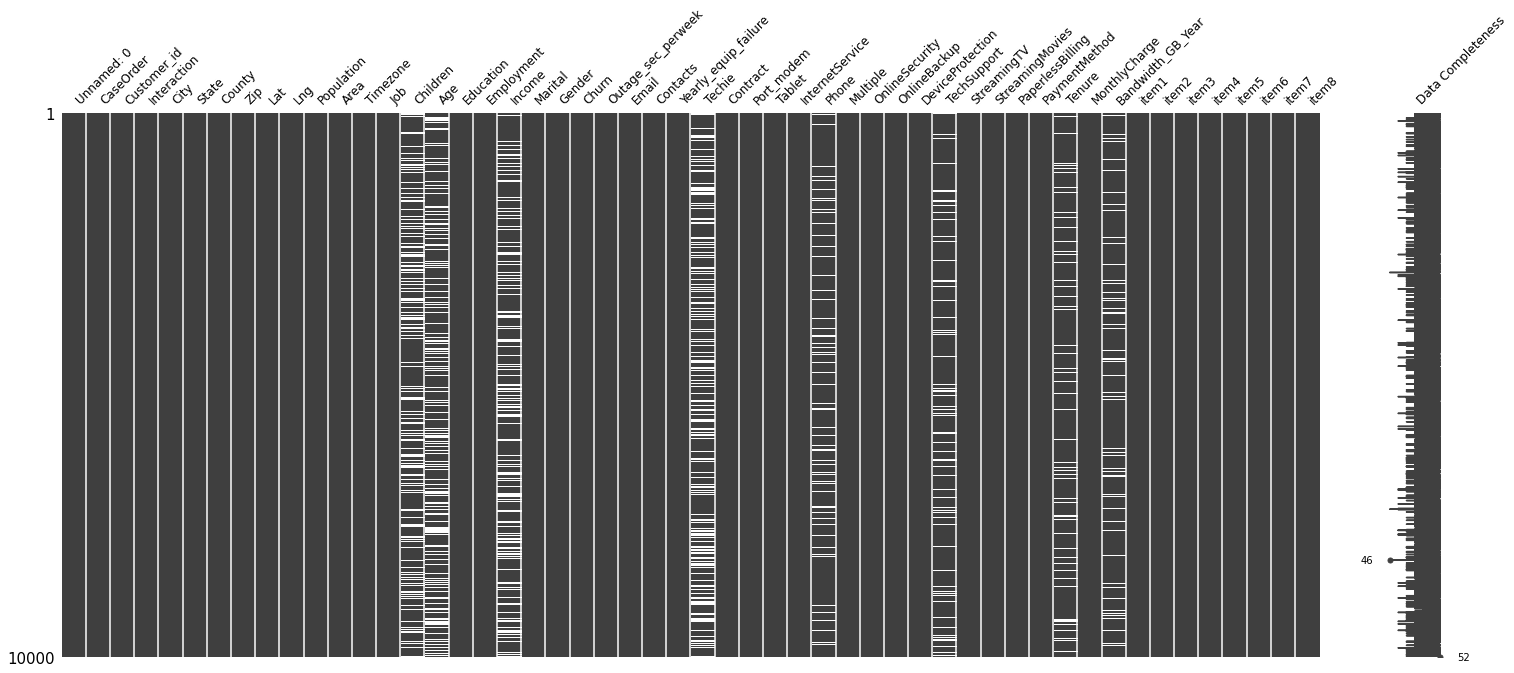

In [46]:
#Missingno visualization of missing data
msno.matrix(df, fontsize = 12, labels = True)

array([[<AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Bandwidth_GB_Year'}>,
        <AxesSubplot:>]], dtype=object)

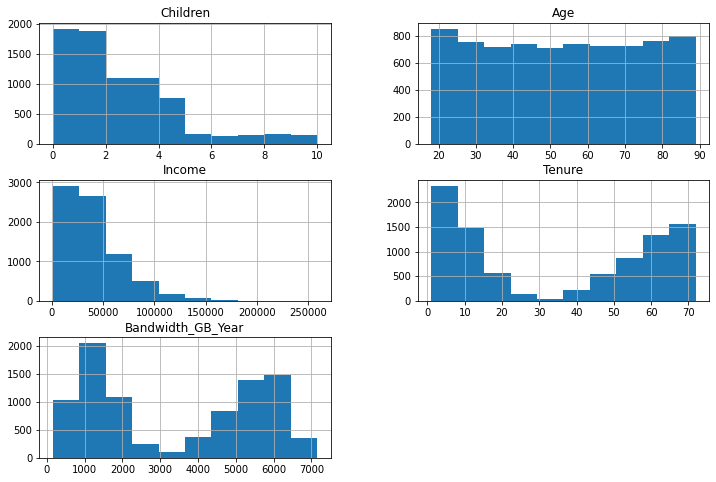

In [47]:
#Check each column containing null values that is a float or integer value. 
#Determine skew, possible ouliers, and distribution. 
df.hist(column=["Children", "Age", "Income", "Tenure", "Bandwidth_GB_Year"], figsize=(12,8))

0


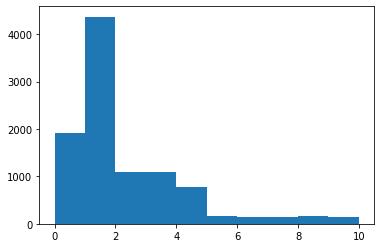

In [48]:
#Children column is right skewed, therefore I will use the median to impute the data.
df['Children'].fillna(df['Children'].median(), inplace = True)

#verify the data was imputed 
print(df['Children'].isnull().sum())

#Check if the distribution of data was effected by the imputation of the median. 
plt.hist(df['Children'])
plt.show()

0


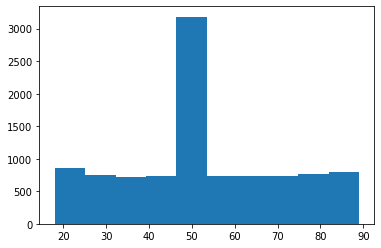

In [49]:
#Age column has a uniform distribution, therefore I will use the mean to impute the data. 
df['Age'].fillna(df['Age'].mean(), inplace = True)

#verify the data was imputed 
print(df['Age'].isnull().sum())

#Check if the distribution of data was effected by the imputation of the mean. 
plt.hist(df['Age'])
plt.show()

0


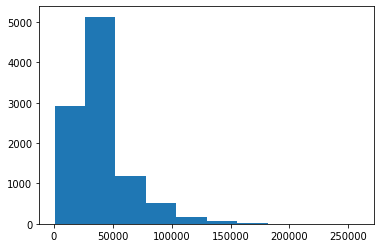

In [50]:
#Income column has is right skewed, therefore I will use the median to impute the data. 
df['Income'].fillna(df['Income'].median(), inplace = True)

#verify the data was imputed 
print(df['Income'].isnull().sum())

#Check if the distribution of data was effected by the imputation of the median. 
plt.hist(df['Income'])
plt.show()

0


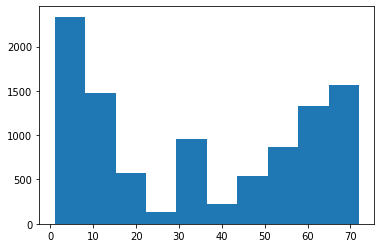

In [51]:
#Tenure column has a bimodal distribution, therefore I decided to use the median to impute the data. 
df['Tenure'].fillna(df['Tenure'].median(), inplace = True)

#verify the data was imputed 
print(df['Tenure'].isnull().sum())

#Check if the distribution of data was effected by the imputation of the mean. 
plt.hist(df['Tenure'])
plt.show()

0


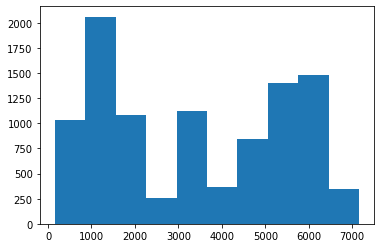

In [52]:
#Bandwidth_GB_Year column has a bimodal distribution, therefore I decided to use the median to impute the data. 
df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].median(), inplace = True)

#verify the data was imputed 
print(df['Bandwidth_GB_Year'].isnull().sum())

#Check if the distribution of data was effected by the imputation of the mean. 
plt.hist(df['Bandwidth_GB_Year'])
plt.show()

In [53]:
#Clean null values from object or text columns using the mode.
impute_with_mode = ['Techie', 'Phone', 'TechSupport']
                    
i=0 
while i < len(impute_with_mode):
    df[impute_with_mode[i]] = df[impute_with_mode[i]].fillna(df[impute_with_mode[i]].mode()[0])
    i = i + 1
    

#verify the data was imputed 
i=0 
while i < len(impute_with_mode):
    print('Null values in ' + str(impute_with_mode[i]) + ': ' + str(df[impute_with_mode[i]].isnull().sum()))
    i = i + 1


Null values in Techie: 0
Null values in Phone: 0
Null values in TechSupport: 0


In [54]:
#double-check all null values have been imputed
df.isnull().sum()

Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

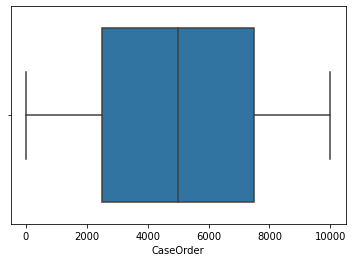

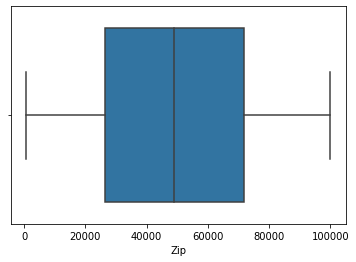

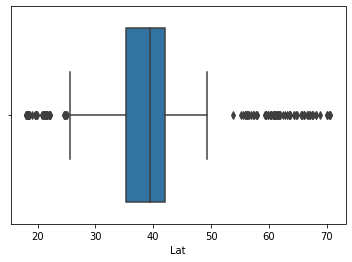

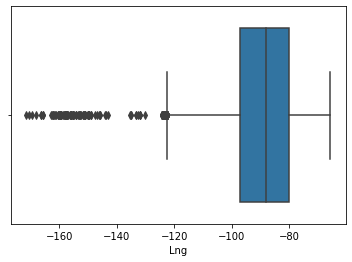

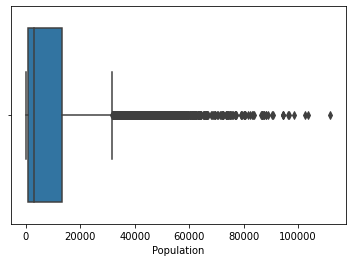

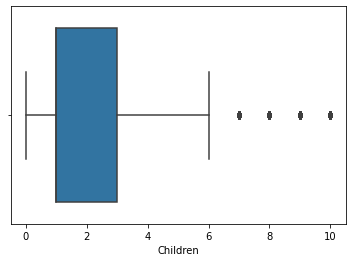

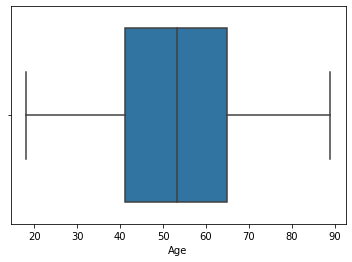

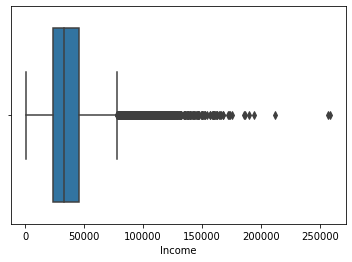

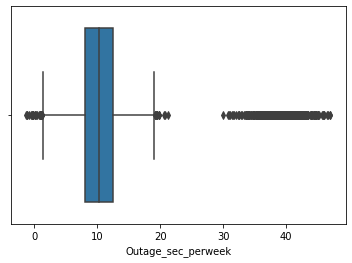

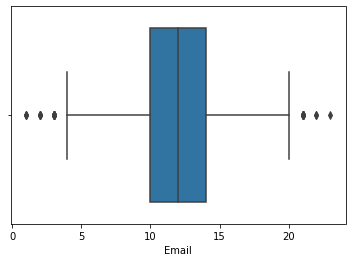

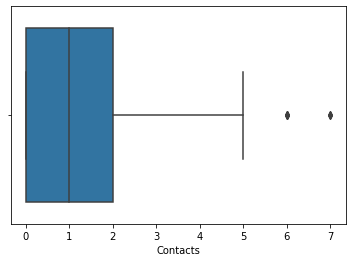

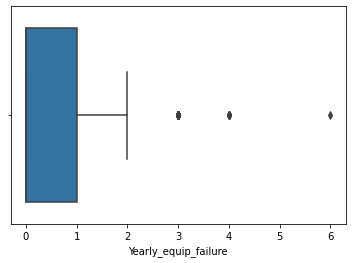

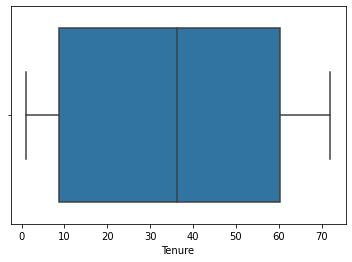

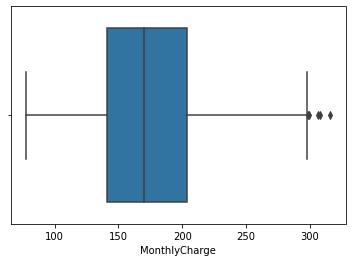

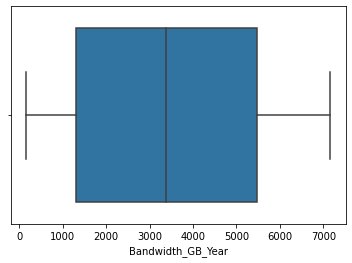

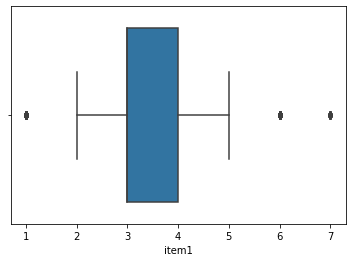

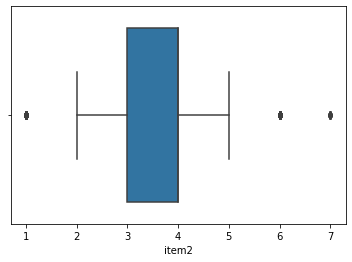

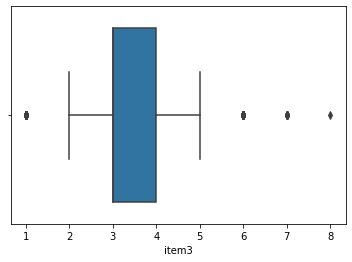

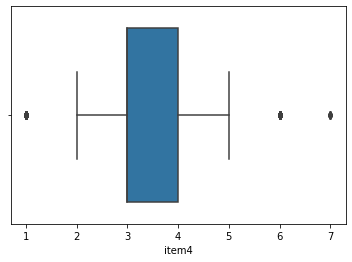

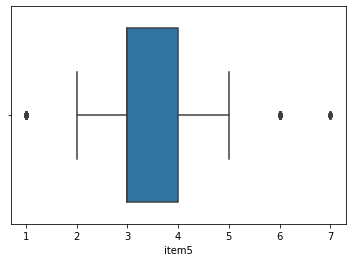

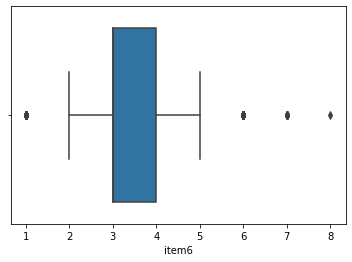

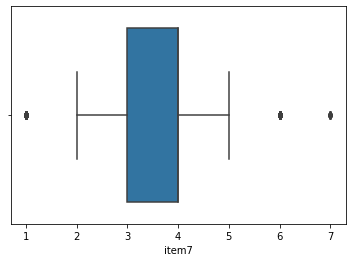

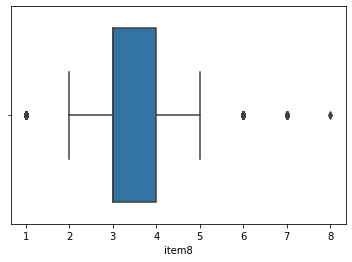

In [55]:
#Using Boxplots, check for outliers in each in each float or integer value column.

outliers = ['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8']

i=0 
while i < len(outliers):
    sns.boxplot(x = outliers[i], data = df)
    plt.show()
    i = i + 1

In [56]:
#Outliers found in Lat, Lng, Population, Children, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, MonthlyCharge, item1, item2, item3, item4, item5, item6, item7, & item8 columns. 
#Treating outliers: 
print(df['Lat'].max())
print(df['Lat'].min())

70.64066
17.96612


In [57]:
#Retain outliers in Lat (Incuding US territories, the min and max are within a valid range)
print(df['Lng'].max())
print(df['Lng'].min())

-65.66785
-171.68815


In [58]:
#Retain outliers in Lng (Incuding US territories, the min and max are within a valid range) 
print(df['Population'].describe())

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64


In [59]:
#Replace outlier population values > 27,000 
#New York City, NY, has the most density population in the US. In New York the max population density is a little over 27,000 per square mile. Therefore the right skewed outliers are likely entry errors.
df['Population'] = np.where(df['Population'] >= 27000, 2931, df['Population']) 
print(df['Population'].describe())

count    10000.000000
mean      4949.264200
std       6338.293875
min          0.000000
25%        738.000000
50%       2910.500000
75%       5943.000000
max      26999.000000
Name: Population, dtype: float64


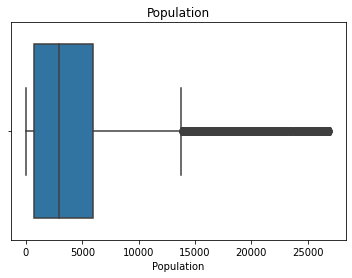

In [60]:
#Check distribution of population data. 
Population_boxplot = sns.boxplot(x = "Population", data = df).set_title("Population")
plt.show()

In [61]:
#Check that the max income is within a reasonable range
print(df['Income'].max())

#Check that the max and min outage_sec_perweek is within a reasonable range
print(df['Outage_sec_perweek'].max())
print(df['Outage_sec_perweek'].min())

258900.7
47.04928
-1.348571


In [62]:
#Retain outliers in Children (All values are possible children values)
#Retain outliers in Income (All values are possible income values)
df['Outage_sec_perweek'].describe()

count    10000.000000
mean        11.452955
std          7.025921
min         -1.348571
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: Outage_sec_perweek, dtype: float64

In [63]:
#Replace negative outliers in Outage_sec_perweek with median because you cannot have less than zero secons of outage
df['Outage_sec_perweek'] = np.where(df['Outage_sec_perweek'] < 0, 10.214231, df['Outage_sec_perweek']) #(Singh, 2019)
print(df['Outage_sec_perweek'].describe())

count    10000.000000
mean        11.464828
std          7.014674
min          0.113821
25%          8.066905
50%         10.213912
75%         12.487644
max         47.049280
Name: Outage_sec_perweek, dtype: float64


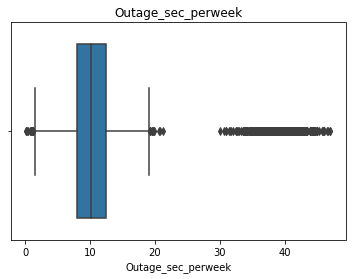

In [64]:
#Check distribution of Outage_sec_perweek data. 
Outage_sec_perweek_boxplot = sns.boxplot(x = "Outage_sec_perweek", data = df).set_title("Outage_sec_perweek")
plt.show()

In [65]:
#Check that the MonthlyCharge income is within a reasonable range
print(df['MonthlyCharge'].max())

315.8786


In [66]:
#Retain outliers in Email (All values are possible email values)
#Retain outliers in Contacts (All values are possible contact values)
#Retain outliers in Yearly_equip_failure (All values are possible equipment failure values)
#Retain outliers in MonthlyCharge (All values are possible monthly charge values)
#Retain outliers in all item answers (All values are possible values for each item answer)

In [67]:
#Re-expressing Categorical Variables 
#Practice label encoding yes/no dichotomous binary columns. 
labelencoder = LabelEncoder()
df['Churn'] = labelencoder.fit_transform(df['Churn'])
print(df['Churn'].head())

0    0
1    1
2    0
3    0
4    1
Name: Churn, dtype: int64


In [68]:
df['Techie'] = labelencoder.fit_transform(df['Techie'])
df['Port_modem'] = labelencoder.fit_transform(df['Port_modem'])
df['Phone'] = labelencoder.fit_transform(df['Phone'])

In [69]:
#Practice Ordinal Encoding 
#First find unique entiries in the education table. 
print(df['Education'].unique())
print(len(df['Education'].unique()))

["Master's Degree" 'Regular High School Diploma' 'Doctorate Degree'
 'No Schooling Completed' "Associate's Degree" "Bachelor's Degree"
 'Some College, Less than 1 Year' 'GED or Alternative Credential'
 'Some College, 1 or More Years, No Degree'
 '9th Grade to 12th Grade, No Diploma' 'Nursery School to 8th Grade'
 'Professional School Degree']
12


In [70]:
df['Education_numeric'] = df['Education'] 
dict_edu = {'Education_numeric': {'No Schooling Completed': 0, 'Nursery School to 8th Grade': 1, '9th Grade to 12th Grade, No Diploma': 2, 'GED or Alternative Credential': 3, 'Regular High School Diploma': 4, 'Some College, Less than 1 Year': 5, 'Some College, 1 or More Years, No Degree': 6, "Associate's Degree": 7, 'Professional School Degree': 8, "Bachelor's Degree": 9, "Master's Degree": 10, 'Doctorate Degree': 11}}
df.replace(dict_edu, inplace = True) 

In [71]:
#Check that Education_numeric was created correctly.
df['Education_numeric'].unique()

array([10,  4, 11,  0,  7,  9,  5,  3,  6,  2,  1,  8])

In [72]:
#Principal Component Analysis
PCA_df = df[['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8']]
PCA_df_normalized = (PCA_df - PCA_df.mean()) / PCA_df.std()
pca = PCA(n_components = PCA_df.shape[1])
pca.fit(PCA_df_normalized)

PCA(n_components=21)

In [74]:
test_pca = pd.DataFrame(pca.transform(PCA_df_normalized), 
                        columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21'])

In [75]:
#PCA Loadings (Middleton, 2022b)
loadings = pd.DataFrame(pca.components_.T, 
                        columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21'],
                        index = PCA_df_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
Lat,-0.001493,-0.020566,-0.002825,0.632033,0.000584,-0.043657,0.014916,-0.087717,0.005048,0.038057,...,-0.177838,-0.167155,-0.712071,0.121099,0.000678,-0.026476,-0.004072,0.022065,-0.007783,0.001186
Lng,0.008049,0.009123,0.023357,-0.491999,0.055732,0.175074,0.005981,-0.056014,0.222465,0.130024,...,-0.724866,0.015525,-0.212183,0.060996,0.027142,-0.038932,0.017360,-0.002587,-0.024015,0.000925
Population,-0.000687,-0.008698,-0.000360,-0.576266,0.042456,-0.039908,0.139266,-0.068278,-0.261718,-0.038115,...,0.430267,-0.128329,-0.595187,-0.026339,-0.028807,0.036047,0.001904,0.030197,0.003534,0.000207
Children,0.000450,-0.000793,0.010789,0.044599,0.022365,0.653901,-0.065575,-0.050266,0.516224,0.102620,...,0.438494,-0.009602,-0.057756,0.020632,-0.040037,0.021048,0.011524,0.020281,-0.007474,-0.018272
Age,0.005061,-0.013214,-0.017056,-0.031877,-0.046331,-0.452208,0.343680,0.176274,0.429752,-0.521462,...,0.099738,0.096212,-0.052914,-0.061221,0.009319,0.001437,-0.012349,0.008801,0.016084,0.021658
Income,-0.000862,0.007710,0.023906,0.034352,0.001347,0.191747,0.411387,-0.705272,0.112454,-0.357549,...,-0.114367,-0.046209,0.097255,0.009061,-0.058604,0.004851,0.000630,0.013215,0.004871,0.001396
Outage_sec_perweek,-0.013692,0.017412,-0.047987,0.074063,0.699820,0.023452,0.021355,-0.005597,-0.021703,0.000202,...,0.010910,0.679792,-0.126479,-0.120688,0.011816,0.014593,-0.018080,0.010979,-0.004150,0.000742
Email,0.008712,-0.020473,-0.004133,-0.105359,0.061020,-0.131234,-0.655536,0.037564,0.426645,-0.324873,...,-0.027235,-0.079048,-0.132363,0.075150,-0.016995,0.015832,0.006672,-0.015620,0.000947,0.005416
Contacts,-0.008537,0.003827,-0.010466,-0.041982,-0.003658,-0.458301,0.161589,-0.229415,0.444629,0.678021,...,0.122113,0.014728,0.014438,0.035751,-0.036615,0.004309,-0.026316,0.020717,-0.000582,-0.002655
Yearly_equip_failure,-0.007734,0.016106,0.006954,0.025460,0.052266,0.238970,0.477422,0.628350,0.179833,0.033732,...,-0.114633,-0.130983,-0.046898,0.035099,0.005043,0.014021,-0.000690,0.007611,-0.021191,-0.002384


In [76]:
#Use Kaiser Rule to create scree plot/elbow charts of eigenvalues to determine which PCs should be kept (>1)
cov_matrix = np.dot(PCA_df_normalized.T, PCA_df_normalized) / PCA_df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

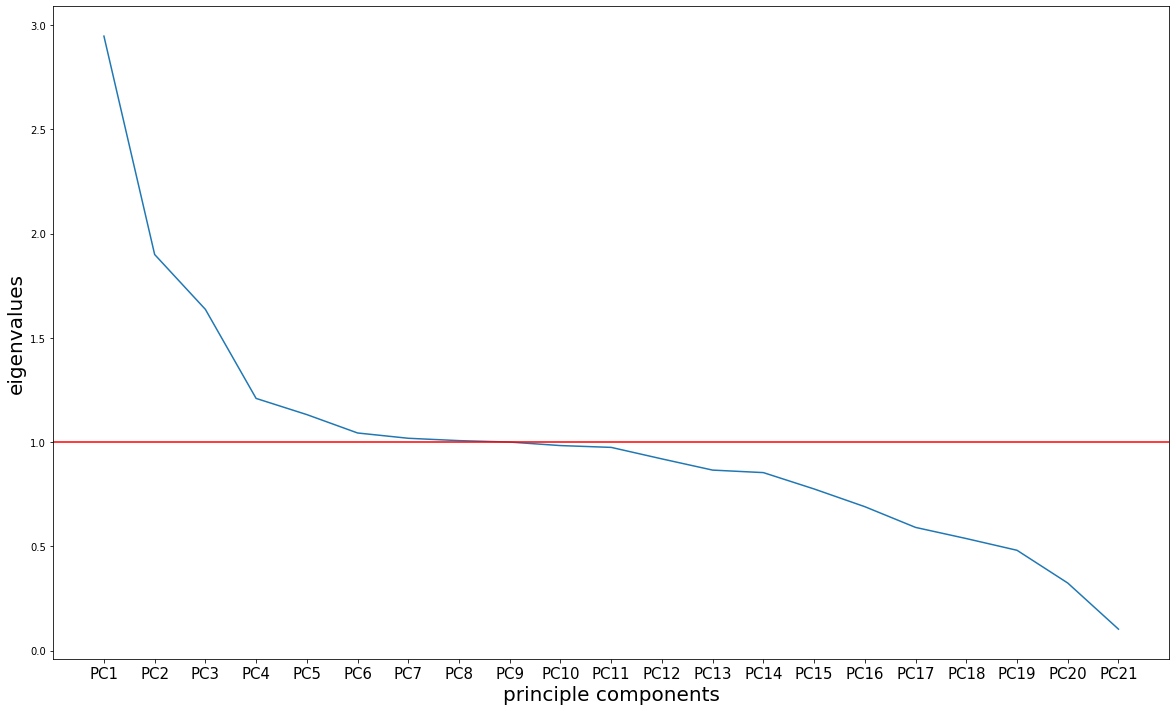

In [77]:
plt.figure(figsize=(20, 12))
plt.plot(eigenvalues)
ax1 = plt.subplot()
ax1.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
ax1.set_xticklabels(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21'], fontsize = 15)
plt.xlabel('principle components', fontsize = 20)
plt.ylabel('eigenvalues', fontsize = 20)
plt.axhline(y=1, color='red')
plt.show()

In [78]:
df.to_csv('/Users/Amanda.Hartzler/Desktop/D206_PA.csv')